# MAT 5983 Midterm
#### Conor Wallace, bhd445
#### 11-01-2019

## 1.

#### Problem Statement

The objective of this problem was to the minimize the energy function stated below, given an arbitrary data set consisting of coordinates, $x \in \mathbb{R}^{2 \times n}$. The number of given samples, $n$, is an $8x8$ grid of uniformly distributed coordinates over the range $[0, 5] \times [0, 5]$.

\begin{equation}
    \min{G(x_{i}) = \lVert\ x_{i} - p_{1} \rVert^{2} \cdot \lVert\ x_{i} - p_{2} \rVert^{2} \cdot \lVert\ x_{i} - p_{3} \rVert^{2}}\\
    \text{for} \, x_{i},p_{i} \in \mathbb{R}^2\\
    \text{such that} \, 0 \preceq x_{i} \preceq 5 
\end{equation}

Steepest descent was used to minimize the energy function by taking the gradient of the function, multiplying it by the step size $\alpha$, and adding it to the current position as can be seen in the equation below.

\begin{equation}
    \dot{x(t)} = x(t) - \alpha \nabla G(x(t))
\end{equation}


#### Code Review

The code is broken up into four segments: the objective function, the gradient of the objective function, the gradient descent algorithm, and finally the trajectory plotting. The algorithm for steepest descent is summarized below.

__Require__: Starting point $x \in dom(f)$

__repeat__
> Compute search direction $\nabla G(x(t))$

> Update: $x^{+} := x - \alpha \nabla G(x(t))$

> until convergence criterion is satisfied

#### Analysis

As stated above, the algorithm begins by generating an $[8 \times 8]$ random set of coordinate data in the range $[0, 5] \times [0, 5]$. Next, each sample is evaluated in the objective and subsequently the gradient of the objective function in order to iteratively compute the next coordinate. In Fig. (1), the plot shows $64$ scattered initial coordinates and their trajectories along the course of the algorithm. It can be seen that each sample gravitated towards the nearest initial memory which perfectly embodies the power of steepest descent in finding global minimums during training.

| <img src="figures/traj.png"> |
| :--: |
| <center>*Fig. (1) Steepest Descent Convergence*</center> |

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas
from sklearn.preprocessing import normalize

In [2]:
%matplotlib inline

In [3]:
'''
Energy Function

parameters: input data vector, x_i, matrix of memory vectors, p

output: euclidean norm between input vector and memory p_i squared 
        multiplied by each subsequent memory norm 
'''
def G(pin, p):
    #G(x) = l2(x - p1)^2*l2(x - p2)^2*l2(x - p3)^2
    f = 1
    for p_t in p:
        f *= (np.linalg.norm((pin - p_t), ord=2)**2)
    return f

p = []
p1 = np.array(([2],[1]))
p.append(p1)
p2 = np.array(([3],[3]))
p.append(p2)
p3 = np.array(([1],[3]))
p.append(p3)

900.0000000000005

In [4]:
'''
Graident of the energy function

parameters, 
'''
def gradient(x, p):
    grad = 1.0
    for p_t in p:
        derivative = np.array(([float(2*(x[0] - p_t[0]))],[float(2*(x[1] - p_t[1]))]))
        f = 1.
        for q_t in p:
            if not np.array_equal(q_t, p_t):
                f *= float((np.linalg.norm((x - q_t), ord=2)**2))
        
        grad += derivative*f

    return grad        

In [5]:
num_rows = 8
num_columns = 8
num_features = 2
init_grid = np.random.uniform(size=(num_rows, num_columns, num_features), low=0, high=5)
init_grid = np.reshape(init_grid, [num_rows*num_columns,2])
# print(grid)
p = []
p1 = np.array(([2],[1]))
p.append(p1)
p2 = np.array(([3],[3] ))
p.append(p2)
p3 = np.array(([1],[3]))
p.append(p3)

pin = np.array(([2.736], [0.30035]))

grid = []
start_grid = []
for i in range(init_grid.shape[0]):
#     print(grid[i].shape)
    grid.append(init_grid[i].reshape(2,1))
    start_grid.append(init_grid[i].reshape(2,1))
    
grid = np.array(grid)
start_grid = np.array(start_grid)
print(grid)

alpha = 0.001
paths = []
for t in range(1000):
    path = []
    for i in range(grid.shape[0]):
        grid[i] = grid[i] + alpha*(-1*gradient(grid[i], p))
        path.append(grid[i])
    paths.append(path)
#     pin = pin + alpha*(-1*gradient(pin, p))
# print pin
print grid

[[[4.01168507]
  [4.03787257]]

 [[3.09790072]
  [4.68866149]]

 [[4.22863275]
  [3.58829819]]

 [[3.97950296]
  [4.56971068]]

 [[4.01733317]
  [2.71286869]]

 [[1.5703243 ]
  [1.79035766]]

 [[3.33198155]
  [2.84891932]]

 [[4.06782728]
  [0.30841496]]

 [[4.47144764]
  [2.15216346]]

 [[0.50169956]
  [3.21901085]]

 [[3.31276064]
  [2.6544952 ]]

 [[2.53760922]
  [3.36771374]]

 [[0.74682954]
  [2.21691437]]

 [[4.80457613]
  [1.48728421]]

 [[0.68161877]
  [1.08879089]]

 [[3.06496203]
  [2.35877496]]

 [[3.37849695]
  [1.7941956 ]]

 [[2.12227523]
  [0.37953178]]

 [[1.08710483]
  [2.60992172]]

 [[1.96420522]
  [3.85813216]]

 [[2.67023876]
  [1.2142237 ]]

 [[3.69569173]
  [4.01060328]]

 [[2.54913467]
  [2.42033414]]

 [[2.32418616]
  [1.60295812]]

 [[4.12085956]
  [3.78821239]]

 [[0.03443693]
  [3.2192642 ]]

 [[3.51515542]
  [3.89718213]]

 [[3.21289882]
  [4.98933752]]

 [[1.73994527]
  [0.46454529]]

 [[3.39340271]
  [4.09656186]]

 [[3.8091408 ]
  [2.49734688]]

 [[4.992

(64, 2, 1)
(64, 2, 1)


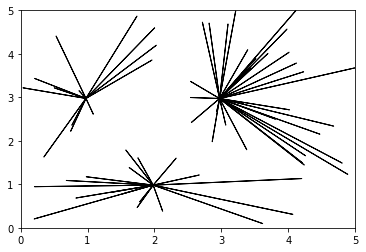

In [6]:
print start_grid.shape
print grid.shape

start_grid = np.reshape(start_grid, [64, 2])
grid = np.reshape(grid, [64, 2])

ax1 = plt.axes()


for i in range(grid.shape[0]):
    x_end = grid[i, 0] - start_grid[i, 0]
    y_end = grid[i, 1] - start_grid[i, 1]
    ax1.arrow(start_grid[i,0], start_grid[i,1], x_end, y_end)

plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

## 2.

#### Problem Statement

In this problem, a given data set $x \in \mathbb{R}^{m \times n}$ is represented using the standard basis, the haar basis, and the eigein basis in order to see the effects of different bases on the sparsity of data.

#### Code Review

The code is split up into three blocks: statistical helper functions, original problem data, and a second random $\mathbb{R}^{16 \times 100}$ problem. As the original problem requested, the code below is capable of computing the bases for any dataset of any dimensionality.

#### Analysis

$x \in \mathbb{R}^{2 \times 5}$

- Standard Basis(x):
    - mean: [0 0]
    - cumulative variance: [2 0.8]
    
- Haar Basis(x):
    - mean: [0 0]
    - cumulative variance: [1.6 1.2]
    
- Eigen Basis(x):
    - mean: [0 0]
    - cumulative variance: [2.03245553 0.76754447]
    
No conclusions could be made from the mean of the given data from the problem. However, the results of the cumulative variance yields an interesting result. All bases' cumulative variance vectors sum to 2.8, however the sparsity of these vectors is different. The standard basis is exactly equal to the variance of each feature vector (row vector) in the data set. The haar basis forces the variance of each row vector to be closer to the mean of their respective variances. Finally, the eigen basis typically puts more weight onto the feature vector with the most variance which is a profound property when determining which features are responsible for the most information in a dataset.

In [14]:
#Helper Functions
def isSymmetric(matrix):
    tr = np.transpose(matrix)
    if tr not in matrix:
        return False
    
    return True
    
def next_power2(n): 
    count = 0; 
    if (n and not(n & (n - 1))): 
        return n 
    while( n != 0): 
        n >>= 1
        count += 1
    return 1 << count; 

def reshape_x(x):
    dx = 0
    dy = 0
    dmax = 0
    if x.ndim > 1:
        if x.shape[0]%2 != 0:
            dx = next_power2(x.shape[0])-x.shape[0]
        x = np.pad(x,(0,dx),'constant')
    else:
        if len(x)%2 != 0:
            dx = next_power2(len(x))-len(x)
        x = np.pad(x,(0,dx),'constant')
    return x

def haarMatrix(n):
    # Allow only size n of power 2
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = haarMatrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])
    A = np.array([[1, 1], [1, -1]])
    h_n = np.kron(h, A)
    return h_n

#Statistical Functions
def autoCovariance(x):
    m = np.zeros((x.shape[0], x.shape[0]))
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            for n in range(x.shape[1]):
                m[i, j] += x[i, n]*x[j, n]
            m[i, j] = (1.0/x.shape[1])*m[i, j]

    return m

def expectationVector(x):
    e = np.zeros((x.shape[0]))
    for n in range(x.shape[1]):
        e += x[:, n]
    
    return e/x.shape[1]

def varianceVector(x, e):
    v = np.zeros((x.shape[0]))
    for i in range(x.shape[0]):
        for n in range(x.shape[1]):
            v[i] += (x[i, n] - e[i])**2
    
    return v/x.shape[1]


#Basis Functions
def std_basis_variance(x):
    basis = np.identity(x.shape[0])
    var = np.dot(basis, x)
    
    return var

def haar_basis_variance(x):
    basis = haarMatrix(x.shape[0])
    var = (1.0/math.sqrt(2))*np.dot(basis, x)
    
    return var

def eig_basis_variance(x, eig):
    var = np.dot(np.linalg.inv(eig), x)
    
    return var
            

In [5]:
x = np.zeros((2,5))
row1 = [2, 1, 0, -1, -2]
row2 = [-1, 1, 1, 0, -1]
In [4]:

x[0, :] = row1
x[1, :] = row2
# print x
m = autoCovariance(x)
e = expectationVector(x)
v = varianceVector(x, e)
if isSymmetric(m):
    print "symmetric"
    
else:
    print "not symmetric"
    
eigval, eigvec = np.linalg.eig(m)
print eigval
print eigvec

std_basis = np.zeros((x.shape[0], x.shape[1]))
haar_basis = np.zeros((x.shape[0], x.shape[1]))
eig_basis = np.zeros((x.shape[0], x.shape[1]))

for n in range(x.shape[1]):
    std_basis[:,n] = std_basis_variance(x[:, n])
    haar_basis[:,n] = haar_basis_variance(x[:, n])
    eig_basis[:,n] = eig_basis_variance(x[:, n], eigvec)
                     
print "std basis: \n", std_basis
print "haar basis: \n", haar_basis
print "eigen basis: \n", eig_basis

std_e = expectationVector(std_basis)
std_v = varianceVector(std_basis, std_e)
haar_e = expectationVector(haar_basis)
haar_v = varianceVector(haar_basis, haar_e)
eig_e = expectationVector(eig_basis)
eig_v = varianceVector(eig_basis, eig_e)

print "std mean: \n", std_e
print "std var: \n", std_v
print "haar mean: \n", haar_e
print "haar var: \n", haar_v
print "eig mean: \n", eig_e
print "eig var: \n", eig_v

symmetric
[2.03245553 0.76754447]
[[ 0.98708746 -0.16018224]
 [ 0.16018224  0.98708746]]
std basis: 
[[ 2.  1.  0. -1. -2.]
 [-1.  1.  1.  0. -1.]]
haar basis: 
[[ 0.70710678  1.41421356  0.70710678 -0.70710678 -2.12132034]
 [ 2.12132034  0.         -0.70710678 -0.70710678 -0.70710678]]
eigen basis: 
[[ 1.81399267  1.1472697   0.16018224 -0.98708746 -2.13435716]
 [-1.30745194  0.82690521  0.98708746  0.16018224 -0.66672297]]
std mean: 
[0. 0.]
std var: 
[2.  0.8]
haar mean: 
[0. 0.]
haar var: 
[1.6 1.2]
eig mean: 
[0. 0.]
eig var: 
[2.03245553 0.76754447]


In [16]:
x = np.random.rand(16,100)
print x.shape[0]
m = autoCovariance(x)
e = expectationVector(x)
v = varianceVector(x, e)
if isSymmetric(m):
    print "symmetric"
    
else:
    print "not symmetric"
    
eigval, eigvec = np.linalg.eig(m)
print eigval
print eigvec

std_basis = np.zeros((x.shape[0], x.shape[1]))
haar_basis = np.zeros((x.shape[0], x.shape[1]))
eig_basis = np.zeros((x.shape[0], x.shape[1]))

for n in range(x.shape[1]):
    std_basis[:,n] = std_basis_variance(x[:, n])
    haar_basis[:,n] = haar_basis_variance(x[:, n])
    eig_basis[:,n] = eig_basis_variance(x[:, n], eigvec)
                     
print "std basis: \n", std_basis
print "haar basis: \n", haar_basis
print "eigen basis: \n", eig_basis

std_e = expectationVector(std_basis)
std_v = varianceVector(std_basis, std_e)
haar_e = expectationVector(haar_basis)
haar_v = varianceVector(haar_basis, haar_e)
eig_e = expectationVector(eig_basis)
eig_v = varianceVector(eig_basis, eig_e)

print "std mean: \n", std_e
print "std var: \n", std_v
print "haar mean: \n", haar_e
print "haar var: \n", haar_v
print "eig mean: \n", eig_e
print "eig var: \n", eig_v

16
symmetric
[4.05921023 0.1397512  0.12171234 0.11973429 0.10900943 0.10473619
 0.03858271 0.04078886 0.04849027 0.05078754 0.05193167 0.06480378
 0.07142423 0.07882095 0.08895974 0.08866477]
[[-0.26740712 -0.16474218 -0.14399399 -0.06046917 -0.36799392  0.27713465
  -0.47253793  0.12335741  0.32049888  0.22469     0.18318073 -0.13564087
  -0.10582063  0.0316239  -0.39383262  0.23188233]
 [-0.21428931  0.43262305 -0.06655953  0.37563568  0.19526344 -0.10510171
   0.02791042  0.0428186  -0.20370543 -0.01656933  0.54082391 -0.2440402
  -0.18060921  0.22274646  0.0582742   0.30025044]
 [-0.22794095  0.10293251 -0.4304105   0.03351158 -0.0033072  -0.10266725
   0.36758962  0.13615775  0.2775681   0.42501262 -0.11835837  0.02705229
   0.28619936 -0.31187901  0.25465866  0.26534715]
 [-0.2545018  -0.27623237  0.03906185 -0.12539802  0.0956287  -0.50839746
  -0.33544757 -0.37820427 -0.2124452  -0.0525123  -0.02147526 -0.1956891
   0.41560896 -0.04272001  0.0105      0.23913526]
 [-0.26658606

## 3.

#### Problem Statement

Create a McCulloch-Pitts (MCP) neural network of n linearly arranged neurons as per the mathematical model below. The input should be a single boolean value ($x=1$) and will propagate along the network. Then perturb the network with random spikes as a function of time.

$u_{i}(n + 1) = \Phi [\Sigma_{j} w_{i,j} u_{j} (n) − v_{TH}]$

#### Analysis

By propogating a boolean value along the linearly arranged network, the output matches exactly the input. Given that the activation function was a unit step function (e.g. $f(x) = [0, 1]$) the threshold value $v_{TH} = 0.5$. By perturbing the system with random spikes of noise, the network failes to generalize to anything outside the range of the activation function. Thus, the network reports a high number of false positives given any amount of noise outside a boolean range.

In [9]:
class neuron():
    def __init__(self, num_layers, num_neurons, threshold, initial_condition):
        self.i = num_neurons
        self.j = num_layers
        self.v = threshold
        self.u = initial_condition
        self.w = np.ones((num_layers, num_neurons))
        
    def unit_step(self, x):
        if x >= 0:
            return 1
        else:
            return 0
    
    def predict(self):
        u_j = self.u
        print u_j
        for j in range(self.j-1):
            for i in range(self.i):
                output = self.unit_step(np.dot(self.w[j, i],u_j) - self.v)
                u_j = output

        print output
        error = 1 - output
        accuracy = float(1 - error)/1.0
        print "accuracy: \n", accuracy

In [10]:
data = 1
mcp = neuron(3, 1, 0.5, data)
mcp.predict()

noise_data = np.random.uniform(-10, 10)
mcp_noise = neuron(3, 1, 0.5, noise_data)
mcp_noise.predict()

1
1
accuracy: 
1.0
-3.60409627958
0
accuracy: 
0.0
